Installing the kaggle library to download the dataset. 

In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 59.0/59.0 KB 208.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 78.2/78.2 KB 870.7 kB/s eta 0:00:00
Using legacy 'setup.py install' for kaggle, since package 'wheel' is not installed.
  Running setup.py install for kaggle: started
  Running setup.py install for kaggle: finished with status 'done'


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Installing the shap library for reducing the size of the dataset.

In [2]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 371.7/371.7 KB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 7.2/7.2 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 1.7 MB/s eta 0:00:00
  Using cached numpy-1.21.6-cp310-cp310-win_amd64.whl (14.0 MB)
     ---------------------------------------- 23.2/23.2 MB 2.1 MB/s eta 0:00:00
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-win_amd64.whl size=430430 sha256=d5fc1e95f752eae943ac667dde83d1651ab143d904f8e04dec1a5d22b03ff91f
  Stored in directory: c:\users\owner\appdata\local\pip

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Installing the opendatasets library to download the dataset from Kaggle directly.

In [3]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 96.6/96.6 KB 502.0 kB/s eta 0:00:00


Importing opendatasets.

In [4]:
import opendatasets as od

Installing torchvision for image transformations.

In [6]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.0/1.0 MB 495.7 kB/s eta 0:00:00
     ------------------------------------ 158.0/158.0 MB 769.7 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Installing opencv for bindings.

In [8]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 35.4/35.4 MB 1.8 MB/s eta 0:00:00


Importing the libraries needed for reading a CSV file and for visualization as well.

In [9]:
import os
from PIL import Image, ImageDraw
import torchvision.transforms as transforms
import cv2
import numpy as np
import pandas as pd

Downloading the dataset from Kaggle.

In [ ]:
od.download("https://www.kaggle.com/competitions/ashrae-energy-prediction/data")

Creating a directory for the downloaded dataset.

In [43]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Using the downloaded JSON to download the output.

In [44]:
! cp kaggle.json ~/.kaggle/

Moving the downloaded JSON to the created directory.

In [45]:
! chmod 600 ~/.kaggle/kaggle.json

Downloading the output.

In [31]:
!kaggle kernels output cereniyim/save-the-energy-for-the-future-2-fe-lightgbm 

tcmalloc: large alloc 2624151552 bytes == 0xc10ea000 @  0x7f55edecb1e7 0x4a3940 0x5b438c 0x5b46f7 0x59afff 0x515655 0x59a257 0x570bf0 0x511ee1 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x5134a6 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x511e2c 0x549576 0x4bca8a
Output file downloaded to /content/X.csv
Output file downloaded to /content/y.csv
Kernel log downloaded to /content/save-the-energy-for-the-future-2-fe-lightgbm.log 


Setting the intial environment.

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# pandas options
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('mode.use_inf_as_na', True)
pd.options.mode.chained_assignment = None

# for date manipulation
from datetime import datetime

# for visualization: matplotlib
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
# to display visuals in the notebook

# for visualization: seaborn
import seaborn as sns
sns.set_context(font_scale=2)

# for data preprocessing
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.model_selection import KFold

# for building the model and calculate RMSE
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt

# to cleanup memory usage
import gc

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

Defining a function to reduce the size of the memory.

In [47]:
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))

Reading the dataset and decreasing its memory size usin the previous function.

In [48]:
X = pd.read_csv("/content/X.csv")
y = pd.read_csv("/content/y.csv", header=None)

reduce_memory_usage(X)
reduce_memory_usage(y)

Mem. usage decreased to 963.98 Mb (74.0% reduction)
Mem. usage decreased to 38.56 Mb (75.0% reduction)


Defining train and test sets.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.30, random_state=21)

Printing the shape of both train and test sets.Z

In [50]:
print(X_train.shape, X_test.shape)

(14151270, 24) (6064830, 24)


Setting the environment for forward feature selection.

In [51]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

Importing the libraries needed for forward feature selection.

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier


In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [56]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [57]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [58]:
y1 =np.array(y) 

In [59]:
y1 =y1.ravel()

Creating target for classiifcations.

In [60]:
target_encoding= []
for x in y1:
  if 0<=x<4:
    target_encoding.append(1)
  elif 4<=x<8:
    target_encoding.append(2)
  elif 8<=x<12:
    target_encoding.append(3)
  elif x>=12:
    target_encoding.append(3)  
target_encoding = np.array(target_encoding)    

Applying forward feature selection using the random forest regression model to determine the most contributing features.

In [ ]:
sfs = SFS(RandomForestRegressor(),
           k_features=X.shape[-1],
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 2,verbose=2)
#Use SFS to select the top 10 features 
sfs.fit(X[0:100000], y1[0:100000])
data_table.enable_dataframe_formatter()
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.4min finished

[2022-05-02 15:32:07] Features: 1/24 -- score: 0.5999468317392862[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  5.4min finished

[2022-05-02 15:37:28] Features: 2/24 -- score: 0.9405908484136458[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  4.7min finished

[2022-05-02 15:42:11] Features: 3/24 -- score: 0.942242248293495[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

,feature_idx,cv_scores,avg_score,feature_names
1,"(21,)","[0.5942085980289736, 0.6056850654495987]",0.600,"(building_id,)"
2,"(19, 21)","[0.9314920592373128, 0.9496896375899789]",0.941,"(meter, building_id)"
3,"(14, 19, 21)","[0.9344027168674558, 0.9500817797195342]",0.942,"(day_of_month, meter, building_id)"
4,"(14, 17, 19, 21)","[0.9347537608132731, 0.9501318021718124]",0.942,"(day_of_month, season, meter, building_id)"
5,"(14, 17, 19, 21, 23)","[0.9345764390900809, 0.9502765187707819]",0.942,"(day_of_month, season, meter, building_id, squ..."
6,"(1, 14, 17, 19, 21, 23)","[0.9346922062896211, 0.9502017055408981]",0.942,"(primary_use, day_of_month, season, meter, bui..."
7,"(1, 5, 14, 17, 19, 21, 23)","[0.9348652639031801, 0.9501982100852182]",0.943,"(primary_use, day_of_week, day_of_month, seaso..."
8,"(1, 5, 14, 17, 19, 21, 22, 23)","[0.934857424468823, 0.9501238669339516]",0.942,"(primary_use, day_of_week, day_of_month, seaso..."
9,"(1, 5, 14, 17, 18, 19, 21, 22, 23)","[0.9345613840095538, 0.9500964990649924]",0.942,"(primary_use, day_of_week, day_of_month, seaso..."
10,"(0, 1, 5, 14, 17, 18, 19, 21, 22, 23)","[0.9346658462867812, 0.9501479953428027]",0.942,"(building_age, primary_use, day_of_week, day_o..."


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

Showing the result of forward feature selection.

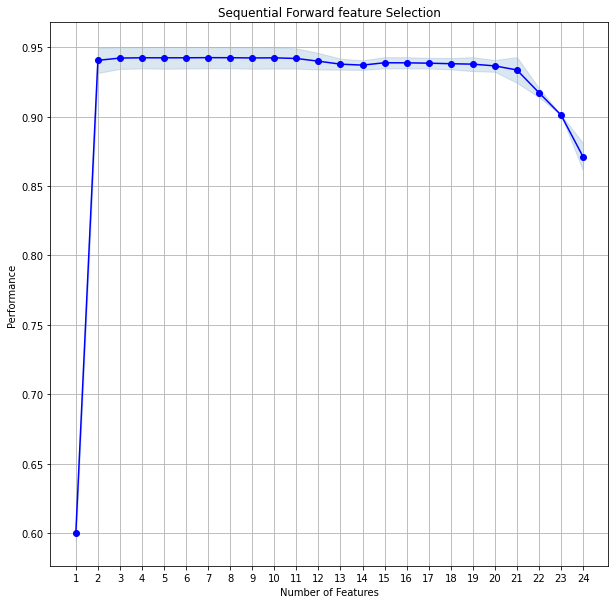

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward feature Selection')
plt.grid()
plt.show()

Importing the libraries needed for decision tree classifcation.

In [69]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import tree


Chosing the best set of features for decision tree classifier.

In [74]:

X1 = X[['cloud_coverage','dew_temperature','wind_speed','sea_level_pressure','air_temperature','season','meter']]
X2 =X1.iloc[0:1000,:]

Fitting the tree classifier.

In [75]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X2, target_encoding[0:1000])

Showing the importance cause of each feature for the decision tree model.

In [77]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 1.25
|   |--- feature_3 <= 509.88
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_3 <= 508.62
|   |   |   |   |--- feature_3 <= 507.62
|   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |--- feature_4 <= 518.75
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  518.75
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  507.62
|   |   |   |   |   |--- feature_4 <= 521.75
|   |   |   |   |   |   |--- feature_3 <= 508.38
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_3 >  508.38
|   |   |   |   |   |   |   |--- feature_5 <= 516.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_5 >  516.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 517.25
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_1 >

Constructing the decison tree graph.

In [78]:
from matplotlib import pyplot as plt

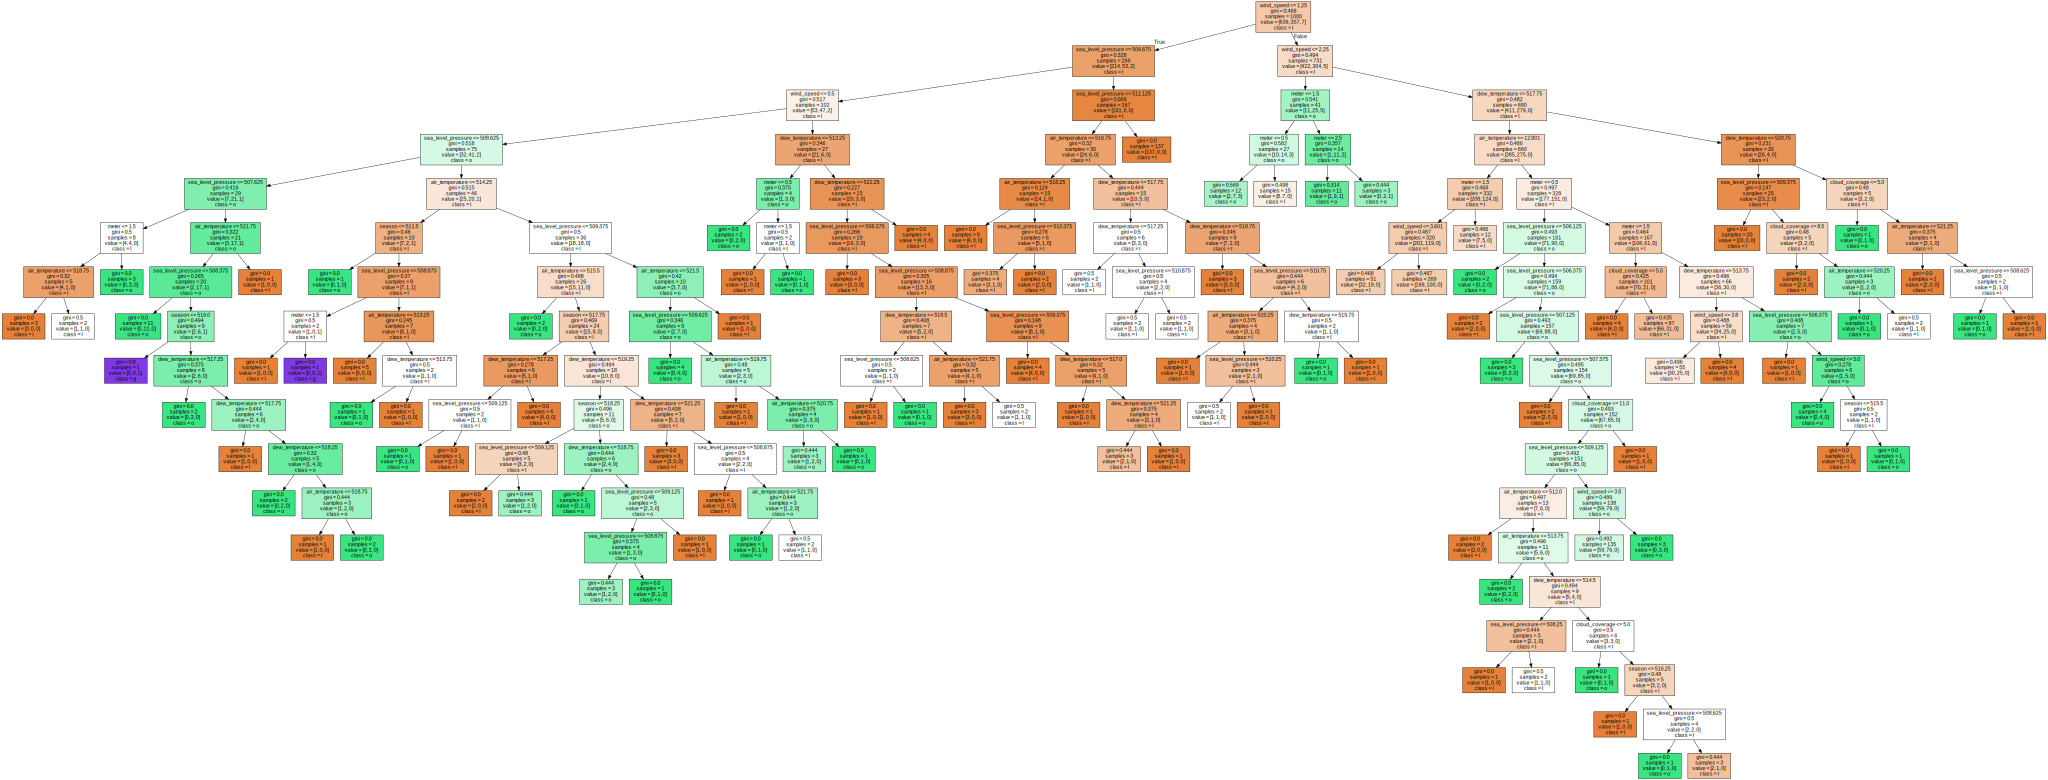

In [85]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                   feature_names=X2.columns,  
                   class_names="log_meter_reading",
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [86]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

Showing the cause and effect of the predictions using the decision tree regressor.

In [90]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [94]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

Determining the importance cause of each feature for the decision tree model.

In [95]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_19 <= 1.50
|   |--- feature_22 <= 0.50
|   |   |--- feature_0 <= 4.00
|   |   |   |--- value: [0.83]
|   |   |--- feature_0 >  4.00
|   |   |   |--- value: [0.03]
|   |--- feature_22 >  0.50
|   |   |--- feature_23 <= 115482.00
|   |   |   |--- value: [3.08]
|   |   |--- feature_23 >  115482.00
|   |   |   |--- value: [4.63]
|--- feature_19 >  1.50
|   |--- feature_21 <= 1072.50
|   |   |--- feature_23 <= 137293.50
|   |   |   |--- value: [3.77]
|   |   |--- feature_23 >  137293.50
|   |   |   |--- value: [5.58]
|   |--- feature_21 >  1072.50
|   |   |--- feature_23 <= 151530.50
|   |   |   |--- value: [5.89]
|   |   |--- feature_23 >  151530.50
|   |   |   |--- value: [7.94]



Constructing the decison tree graph.

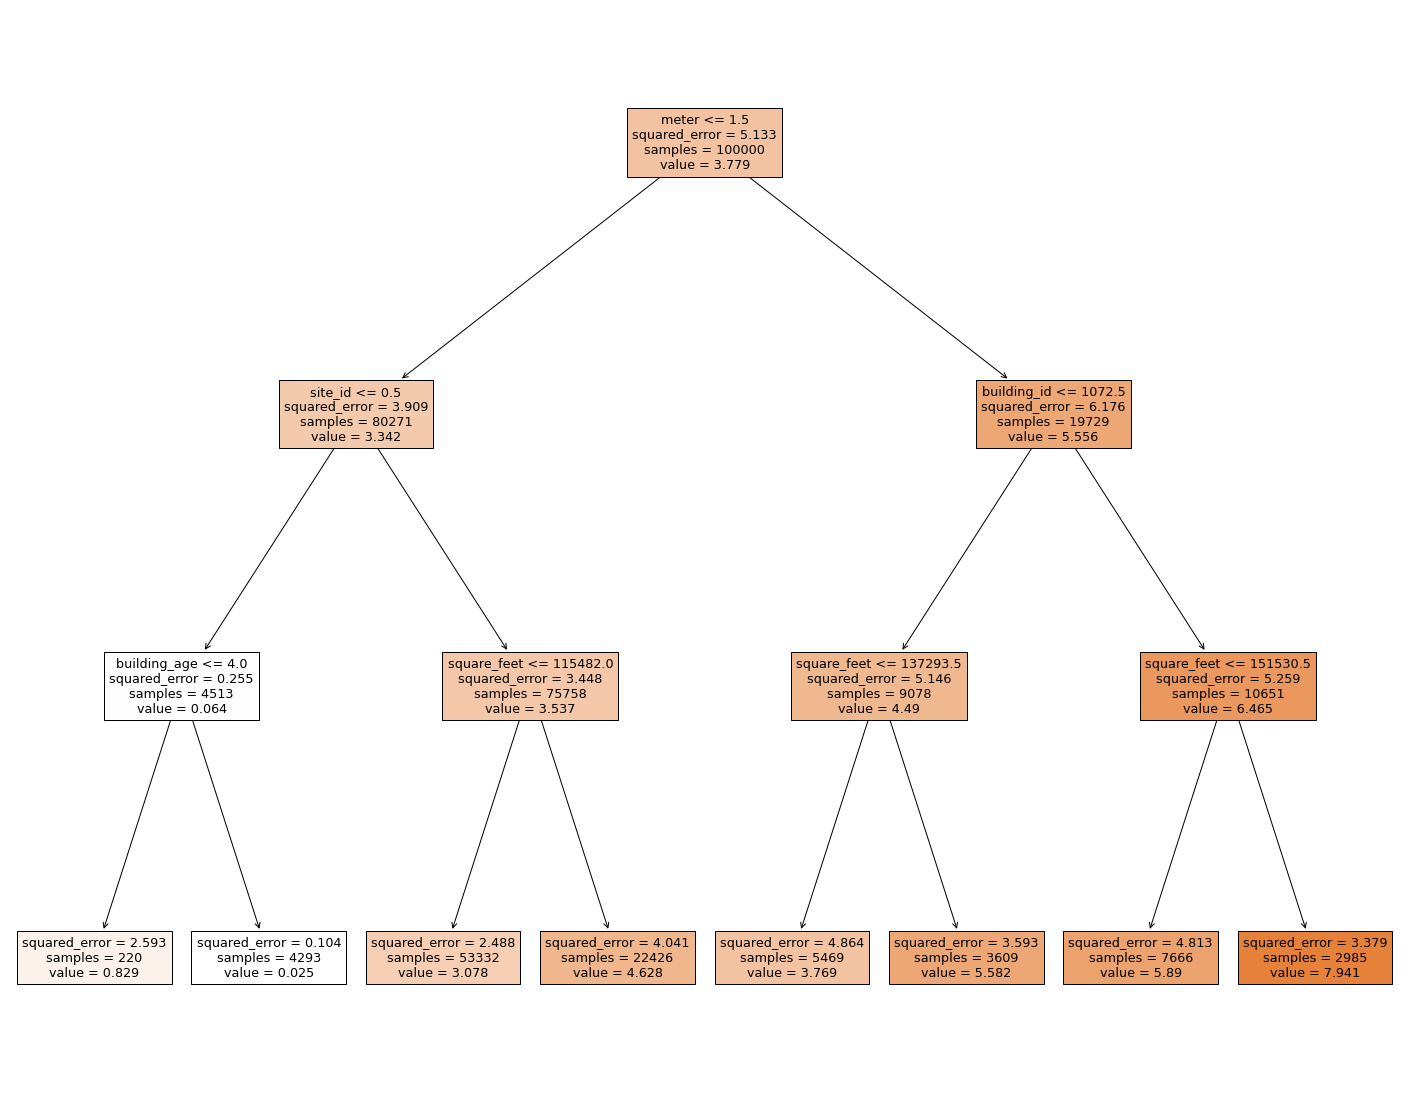

In [97]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=X.columns, filled=True)

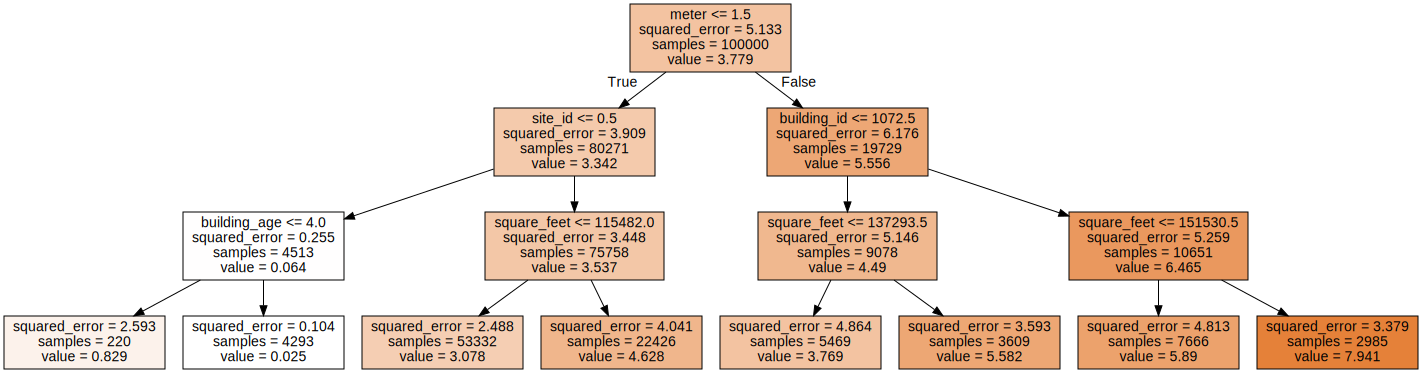

In [98]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=X.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

Renaming the target class.

In [ ]:
y.rename(columns = {0: "log_meter_reading"}, 
         inplace=True)

Defining the initial parameters for the gbrt model.

In [ ]:
categorical_features = ['building_id', 'site_id', 'meter',
                        'primary_use', 'wind_compass_direction',
                        'day_of_week', 'hour','is_weekend', 'season']

# initial parameters of light gbm algorithm
initial_params = {"objective": "regression",
                  "boosting": "gbdt",
                  "num_leaves": 60,
                  "learning_rate": 0.05,
                  "feature_fraction": 0.85,
                  "reg_lambda": 2,
                  "metric": {'rmse'}
}

Training the gbrt model among 4 folds using the k-fold strategy.

In [ ]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# save 4 model as a list
models = []

# dynamically split X and y with the k-fold split indexes
for train_index,valid_index in kf.split(X):
    X_train_kf = X.loc[train_index]
    y_train_kf = y.loc[train_index]
    
    X_valid_kf = X.loc[valid_index]
    y_valid_kf = y.loc[valid_index]
    
    d_train = lgb.Dataset(X_train_kf, 
                          label=y_train_kf,
                          categorical_feature=categorical_features, 
                          free_raw_data=False)
    
    d_valid = lgb.Dataset(X_valid_kf, 
                          label=y_valid_kf,
                          categorical_feature=categorical_features, 
                          free_raw_data=False)
    
    model = lgb.train(initial_params, 
                      train_set=d_train, 
                      num_boost_round=1000, 
                      valid_sets=[d_train, d_valid],
                      verbose_eval=250, 
                      early_stopping_rounds=500)
    
    models.append(model)
    
    del X_train_kf, y_train_kf, X_valid_kf, y_valid_kf, d_train, d_valid
    gc.collect()

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 500 rounds.
[250]	training's rmse: 0.847416	valid_1's rmse: 0.849453
[500]	training's rmse: 0.781849	valid_1's rmse: 0.784646
[750]	training's rmse: 0.741664	valid_1's rmse: 0.745078
[1000]	training's rmse: 0.712066	valid_1's rmse: 0.716042
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.712066	valid_1's rmse: 0.716042
Training until validation scores don't improve for 500 rounds.
[250]	training's rmse: 0.852184	valid_1's rmse: 0.853084
[500]	training's rmse: 0.778125	valid_1's rmse: 0.779851
[750]	training's rmse: 0.739742	valid_1's rmse: 0.742028
[1000]	training's rmse: 0.714243	valid_1's rmse: 0.717144
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.714243	valid_1's rmse: 0.717144
Training until validation scores don't improve for 500 rounds.
[250]	training's rmse: 0.842155	valid_1's rmse: 0.842933
[500]	training's rmse: 0.767714	valid_1's rmse: 0.769058
[750]	training's rmse: 0.72

Deleting the used dataset.

In [ ]:
del X
del y
gc.collect()

796

Importing a new dataset containing information related to the weather condition as well as the building structure.

In [ ]:
building = pd.read_csv("/content/ashrae-energy-prediction/building_metadata.csv")
# drop floor_count
building.drop(columns=["floor_count"], inplace=True)

# load weather_test modify
weather_test = pd.read_csv("/content/ashrae-energy-prediction/weather_test.csv")
weather_test["timestamp"] = pd.to_datetime(weather_test["timestamp"],
                                            format='%Y-%m-%d %H:%M:%S')

# load test and modify
test = pd.read_csv("/content/ashrae-energy-prediction/test.csv")
test["timestamp"] = pd.to_datetime(test["timestamp"],
                                   format='%Y-%m-%d %H:%M:%S')

reduce_memory_usage(building)
reduce_memory_usage(weather_test)
reduce_memory_usage(test)

Mem. usage decreased to  0.02 Mb (57.4% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)


Creating a new feature having the name "building_age" and adding it to the original dataset.

In [ ]:
current_year = datetime.now().year
building['building_age'] = current_year - building['year_built']
building.drop(columns=['year_built'], inplace=True)

# since NA values only present in building age fillna can be used
building.fillna(round(building.building_age.mean(),0),
                inplace=True)

Using label encoder to convert categorical dataset to numerical values.

In [ ]:
le = LabelEncoder()
le_primary_use = le.fit_transform(building.primary_use)

# add label encoded column to dataframe
building['primary_use'] = le_primary_use

del le, le_primary_use
gc.collect()


103

Convert season coding to numerical values>

In [ ]:
def convert_season(month):
    if (month <= 2) | (month == 12):
        return 0
    # as winter
    elif month <= 5:
        return 1
    # as spring
    elif month <= 8:
        return 2
    # as summer
    elif month <= 11:
        return 3
    # as fall

Converting the data type of the features from float to int in order to reduce the number of columns existing in the dataset.

In [ ]:
weather_test['month'] = weather_test['timestamp'].dt.month.astype(np.int8)
weather_test['day_of_week'] = weather_test['timestamp'].dt.dayofweek.astype(np.int8)
weather_test['day_of_month']= weather_test['timestamp'].dt.day.astype(np.int8)
weather_test['hour'] = weather_test['timestamp'].dt.hour
weather_test['season'] = weather_test.month.apply(convert_season)

# add is_weekend column
weather_test['is_weekend'] = weather_test.day_of_week.apply(lambda x: 1 if x>=5 else 0)

Setting the index for both day and month.

In [ ]:
weather_test = weather_test.set_index(
    ['site_id','day_of_month','month'])

Updating the air_temprature feature based on day and month and then adding it to the dataset again.

In [ ]:
# create dataframe of daily means per site id
air_temperature_filler = pd.DataFrame(weather_test
                                      .groupby(['site_id','day_of_month','month'])
                                      ['air_temperature'].mean(),
                                      columns=["air_temperature"])
# create dataframe of air_temperatures to fill
temporary_df = pd.DataFrame({'air_temperature' : weather_test.air_temperature})

# update NA air_temperature values
temporary_df.update(air_temperature_filler, overwrite=False)

# update in the weather train dataset
weather_test["air_temperature"] = temporary_df["air_temperature"]

del temporary_df, air_temperature_filler
gc.collect()

0

Updating the cloud_coverage feature based on day and mounth then adding it to the dataset again.

In [ ]:
# create dataframe of daily means per site id
cloud_coverage_filler = pd.DataFrame(weather_test
                                     .groupby(['site_id','day_of_month','month'])
                                     ['cloud_coverage'].mean(),
                                     columns = ['cloud_coverage'])
cloud_coverage_filler.fillna(round(cloud_coverage_filler.cloud_coverage.mean(),0), 
                             inplace=True)

# create dataframe of cloud_coverages to fill
temporary_df = pd.DataFrame({'cloud_coverage' : weather_test.cloud_coverage})

# update NA cloud_coverage values
temporary_df.update(cloud_coverage_filler, overwrite=False)

# update in the weather train dataset
weather_test["cloud_coverage"] = temporary_df["cloud_coverage"]

del temporary_df, cloud_coverage_filler
gc.collect()

0

Updating the dew_temperature feature based on day and month then adding it to the dataset again in addition to filling the null values of the dataset.

In [ ]:
dew_temperature_filler = pd.DataFrame(weather_test
                                      .groupby(['site_id','day_of_month','month'])
                                      ['dew_temperature'].mean(),
                                      columns=["dew_temperature"])
# create dataframe of dew_temperatures to fill
temporary_df = pd.DataFrame({'dew_temperature' : weather_test.dew_temperature})

# update NA dew_temperature values
temporary_df.update(dew_temperature_filler, overwrite=False)

# update in the weather train dataset
weather_test["dew_temperature"] = temporary_df["dew_temperature"]

del temporary_df, dew_temperature_filler
gc.collect()

0

Updating the precip_depth_filler feature based on day and month then adding it to the dataset again in addition to filling the null values of the dataset.




In [ ]:
precip_depth_filler = pd.DataFrame(weather_test
                                   .groupby(['site_id','day_of_month','month'])
                                   ['precip_depth_1_hr'].mean(),
                                   columns=['precip_depth_1_hr'])
precip_depth_filler.fillna(round(precip_depth_filler['precip_depth_1_hr'].mean(),0)
                           , inplace=True)

# create dataframe of precip_depth_1_hr to fill
temporary_df = pd.DataFrame({'precip_depth_1_hr' : weather_test.precip_depth_1_hr})

# update NA precip_depth_1_hr values
temporary_df.update(precip_depth_filler, overwrite=False)

# update in the weather train dataset
weather_test["precip_depth_1_hr"] = temporary_df["precip_depth_1_hr"]

del precip_depth_filler, temporary_df
gc.collect()

0

Updating the sea_level_filler feature based on day and month then adding it to the dataset in addition to filling the null values of the dataset.




In [ ]:
sea_level_filler = pd.DataFrame(weather_test
                                .groupby(['site_id','day_of_month','month'])
                                ['sea_level_pressure'].mean(),
                                columns=['sea_level_pressure'])
mean_sea_level_pressure = round(
    sea_level_filler
    ['sea_level_pressure']
    .astype(float)
    .mean(),2)

sea_level_filler.fillna(mean_sea_level_pressure, inplace=True)

# create dataframe of sea_level_pressure to fill
temporary_df = pd.DataFrame({'sea_level_pressure' : weather_test.sea_level_pressure})

# update NA sea_level_pressure values
temporary_df.update(sea_level_filler, overwrite=False)

# update in the weather train dataset
weather_test["sea_level_pressure"] = temporary_df["sea_level_pressure"]

del sea_level_filler, temporary_df
gc.collect()

0

Updating the wind_direction_filler feature based on day and month then adding it to the dataset in addition to filling the null values of the dataset.




In [ ]:
# create dataframe of daily means per site id
wind_direction_filler = pd.DataFrame(weather_test
                                     .groupby(['site_id','day_of_month','month'])
                                     ['wind_direction'].mean(),
                                     columns=['wind_direction'])
# create dataframe of wind_direction to fill
temporary_df = pd.DataFrame({'wind_direction' : weather_test.wind_direction})

# update NA wind_direction values
temporary_df.update(wind_direction_filler, overwrite=False)

# update in the weather train dataset
weather_test["wind_direction"] = temporary_df["wind_direction"]

del temporary_df, wind_direction_filler
gc.collect()

0

Updating the wind_speed_filler feature based on day and month then adding it to the dataset in addition to filling the null values of the dataset.




In [ ]:
wind_speed_filler = pd.DataFrame(weather_test
                                 .groupby(['site_id','day_of_month','month'])
                                 ['wind_speed'].mean(),
                                 columns=['wind_speed'])
# create dataframe of wind_speed to fill
temporary_df = pd.DataFrame({'wind_speed' : weather_test.wind_speed})

# update NA wind_speed values
temporary_df.update(wind_speed_filler, overwrite=False)

# update in the weather train dataset
weather_test["wind_speed"] = temporary_df["wind_speed"]

del temporary_df, wind_speed_filler
gc.collect()

0

Showing the null values of the dataset.

In [ ]:
weather_test.isna().sum()


timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
day_of_week           0
hour                  0
season                0
is_weekend            0
dtype: int64

Reseting the index for the weather information. 

In [ ]:
weather_test = weather_test.reset_index()

Encoding the direction of wind to numerical values

In [ ]:
def convert_direction(degrees):
    if degrees <= 90:
        return 0
    # as norteast direction
    elif degrees <= 180:
        return 1
    # as southeast direction
    elif degrees <= 270:
        return 2
    # as southwest direction
    elif degrees <= 360:
        return 3
    # as northwest direction
weather_test['wind_compass_direction'] = weather_test.wind_direction.apply(convert_direction)
weather_test.drop(columns=['wind_direction'], inplace=True)

Cacluating the average among the weather related information to add more features to the dataset.

In [ ]:
weather_test['meansea_level_pressure_wind_speed'] = (weather_test['sea_level_pressure'] +
                                                     weather_test['wind_speed']) / 2
weather_test['meancloud_coverage_sea_level_pressure'] = (weather_test['sea_level_pressure'] + 
                                                         weather_test['cloud_coverage']) / 2
weather_test['meancloud_coverage_wind_speed '] = (weather_test['cloud_coverage'] + 
                                                  weather_test['wind_speed']) / 2
weather_test['meanprecip_depth_1_hr_sea_level_pressure'] = (weather_test['precip_depth_1_hr'] + 
                                                            weather_test['sea_level_pressure']) / 2
weather_test['meanair_temperature_sea_level_pressure'] = (weather_test['air_temperature'] + 
                                                          weather_test['sea_level_pressure']) / 2

Merging together the information related to both weather and building into a single dataset.

In [ ]:
test = test.merge(building, on = "building_id", how = "left")
test = test.merge(weather_test, on = ["site_id", "timestamp"], how="left")

# delete the other ones to save space from the memory
del weather_test
del building
gc.collect()

250

Dropping the unecessary features like row_id and timestamp.

In [ ]:
test.drop(columns = ["row_id", 
                     "timestamp"], inplace=True)

In [ ]:
print("Number of unique columns in the test dataset:", test.shape[1])

Number of unique columns in the test dataset: 24


Creating a test set for 2017 and 2018.

In [ ]:
# split test set into two for faster imputations
X_test_2017 = test[:20848800]
X_test_2018 = test[20848800:]

del test
gc.collect()

250

Filling the null values of the 2017 test and reducing its memory capacity.

In [ ]:
X_test_2017 = X_test_2017.fillna(method='ffill', axis=1)
reduce_memory_usage(X_test_2017)
gc.collect()

Mem. usage decreased to 1153.21 Mb (71.0% reduction)


0

Filling the null values of the 2018 test and reducing its memory capacity.

In [ ]:
X_test_2018 = X_test_2018.fillna(method='ffill', axis=1)
reduce_memory_usage(X_test_2018)
gc.collect()

Mem. usage decreased to 1153.21 Mb (71.0% reduction)


0

Reducing memory capacity of the integer features by using the data type "int8"(8 byte integer number).

In [ ]:
int_features = ['building_age', 'primary_use', 
                'is_weekend',  'wind_compass_direction']

for feature in int_features:
    X_test_2017[feature] = X_test_2017[feature].astype('int8')
    X_test_2018[feature] = X_test_2018[feature].astype('int8')

Running the gbrt model on the 2017 datasets.

In [ ]:
predictions_2017 = []

for model in models:
    if  predictions_2017 == []:
        predictions_2017 = (np
                            .expm1(model
                                   .predict(X_test_2017, 
                                            num_iteration=model.best_iteration)) / len(models))
    else:
        predictions_2017 += (np
                             .expm1(model
                                    .predict(X_test_2017,
                                             num_iteration=model.best_iteration)) / len(models))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


Running the gbrt model on the 2018 datasets.

In [ ]:
predictions_2018 = []

for model in models:
    if  predictions_2018 == []:
        predictions_2018 = (np
                            .expm1(model
                                   .predict(X_test_2018, 
                                            num_iteration=model.best_iteration)) / len(models))
    else:
        predictions_2018 += (np
                             .expm1(model
                                    .predict(X_test_2018, 
                                             num_iteration=model.best_iteration)) / len(models))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


Showing the most important features by means of the gbrt model. 

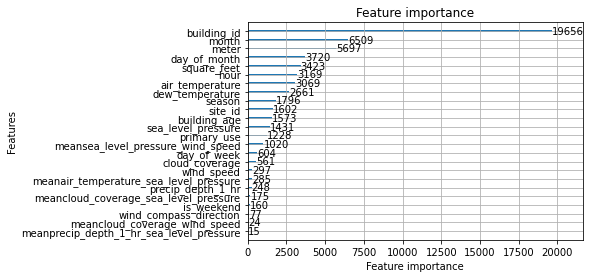

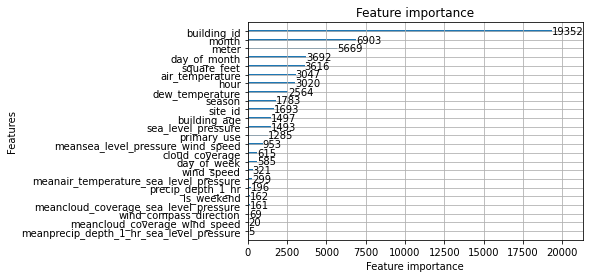

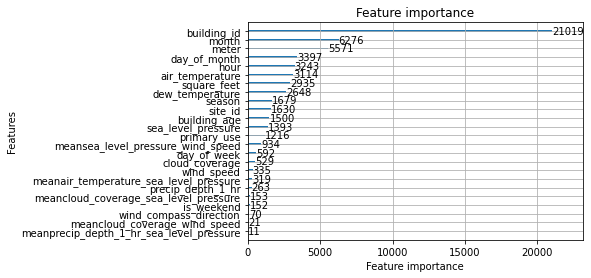

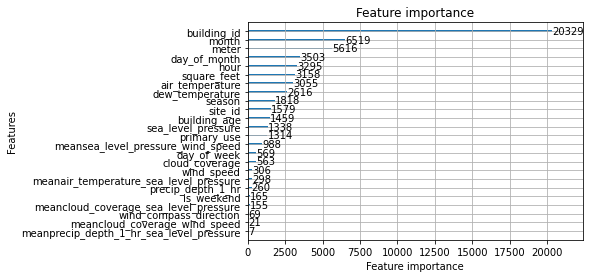

In [ ]:
for model in models:
    lgb.plot_importance(model)
    plt.show()
